# Projekat 3 - duboko učenje

**Dataset**: https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

**Definicija problema**: Klasifikacija slika za papir-kamen-makaze

**Vrsta problema**: višeklasna klasifikacija

## Učitavanje *dataset*-a

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import cv2
import os
import random
import tensorflow as tf

In [2]:
main_directory = 'dataset/'
subfolders = ['paper','rock','scissors']

dataset=[]
label=0
for subfolder in subfolders:
    folder = os.path.join(main_directory,subfolder)
    for image in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,image))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (75, 50))
        #img = img.flatten()
        img = img/255.0
        dataset.append((img,label))
    label+=1
random.shuffle(dataset)
X, y =zip(*dataset)

X = np.array(X)
y = np.array(y)

*Dataset* se sastoji od slika položaja šake za papir, kamen i makaze. 

Slike se učitavaju u *grayscale* formatu (budući da informacija o bojama nije potrebna za rešavanje datog problema), i zatim se skaliraju na manje dimenzije. Ovakva reprezentacija se pretapa u *numpy* niz, a vrednosti svakog elementa skaliraju u odnosu na 255, što je maksimalna vrednost jednog piksela slike. 

Kroz samo učitavanje slika, enkodiraju se i kategoričke labele u sledećem formatu:
- 0 - *paper*
- 1 - *rock*
- 2 - *scissors*

Na ovaj način se kreiraju *feature* vektor i *target* vektor. *Shuffle* funkcija se koristi da izmeša uzorke tako da u kasnijem treniranju mreže ne dođe do *bias*-a usled sukcesivnih podataka koji pripadaju istoj klasi.

In [3]:
print(X.shape)

(2188, 50, 75, 3)


Oblik *feature* vektora govori da se u *dataset*-u nalazi 2188 uzoraka, i da je svaka slika enkodirana kao vektor od 3750 float vrednosti.

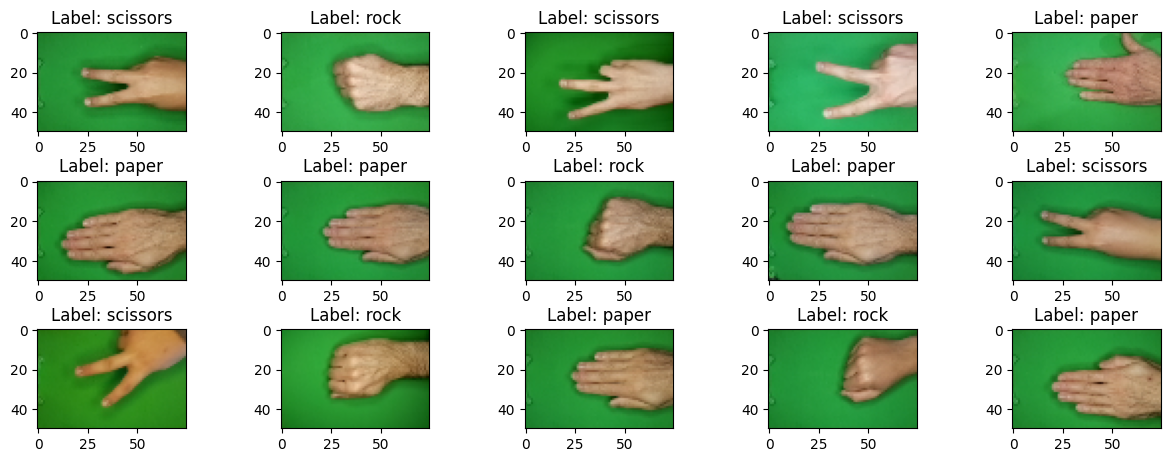

In [4]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5, 5, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {subfolders[y[i]]}')

Grafik iznad prikazuje izgled učitanih i skaliranih slika.

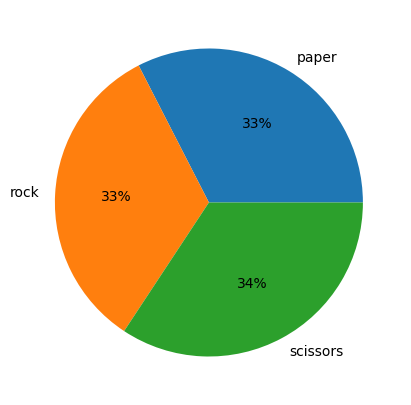

In [56]:
plt.figure(figsize=(7, 5))
unique, counts = np.unique(y,return_counts=True)

pie = plt.pie(counts,labels = subfolders, autopct='%1.0f%%')
plt.show()

Grafik iznad prikazuje distribuciju podataka po klasama. Uočava se da je u pitanju gotovo idealna podela, gde svaka klasa ima jednak broj uzoraka.

## Kreiranje modela

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [6]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [100]:
network = Sequential()
network.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=(50,75,3),activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Dropout(0.5))
network.add(Flatten())
network.add(Dense(128,activation='relu'))
network.add(Dropout(0.5))
network.add(Dense(3,activation='softmax'))
network.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 46, 71, 64)        4864      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 23, 35, 64)       0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 23, 35, 64)        0         
                                                                 
 flatten_14 (Flatten)        (None, 51520)             0         
                                                                 
 dense_28 (Dense)            (None, 128)               6594688   
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                     

In [101]:
network.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [61]:
history = network.fit(X_train,y_train,epochs=25,verbose=2,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/25
28/28 - 5s - loss: 1.5442 - accuracy: 0.4920 - val_loss: 0.6623 - val_accuracy: 0.7922 - 5s/epoch - 187ms/step
Epoch 2/25
28/28 - 5s - loss: 0.6472 - accuracy: 0.7434 - val_loss: 0.3530 - val_accuracy: 0.8790 - 5s/epoch - 196ms/step
Epoch 3/25
28/28 - 13s - loss: 0.3946 - accuracy: 0.8549 - val_loss: 0.4352 - val_accuracy: 0.8196 - 13s/epoch - 480ms/step
Epoch 4/25
28/28 - 5s - loss: 0.2997 - accuracy: 0.8931 - val_loss: 0.2717 - val_accuracy: 0.9087 - 5s/epoch - 193ms/step
Epoch 5/25
28/28 - 3s - loss: 0.2333 - accuracy: 0.9200 - val_loss: 0.2282 - val_accuracy: 0.9224 - 3s/epoch - 120ms/step
Epoch 6/25
28/28 - 5s - loss: 0.1925 - accuracy: 0.9286 - val_loss: 0.1691 - val_accuracy: 0.9452 - 5s/epoch - 162ms/step
Epoch 7/25
28/28 - 3s - loss: 0.1645 - accuracy: 0.9417 - val_loss: 0.1333 - val_accuracy: 0.9635 - 3s/epoch - 117ms/step
Epoch 8/25
28/28 - 3s - loss: 0.1733 - accuracy: 0.9389 - val_loss: 0.1490 - val_accuracy: 0.9566 - 3s/epoch - 123ms/step
Epoch 9/25
28/28 - 4s 

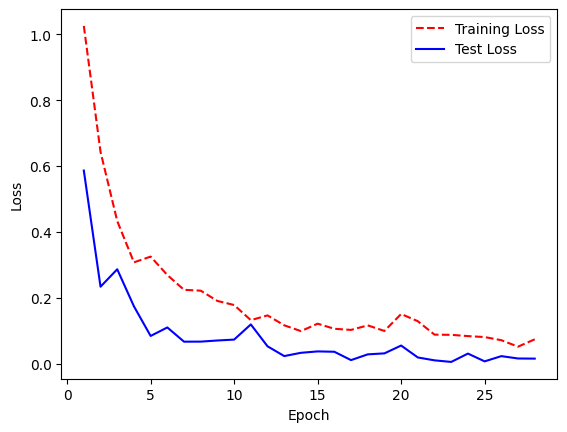

In [16]:
def visualizeLoss(history):
    training_loss = history.history['loss']
    test_loss = history.history['val_loss']

    epoch_count = range(1,len(training_loss)+1)

    plt.plot(epoch_count,training_loss,"r--")
    plt.plot(epoch_count,test_loss,"b-")
    plt.legend(["Training Loss","Test Loss"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()
visualizeLoss(history=history)

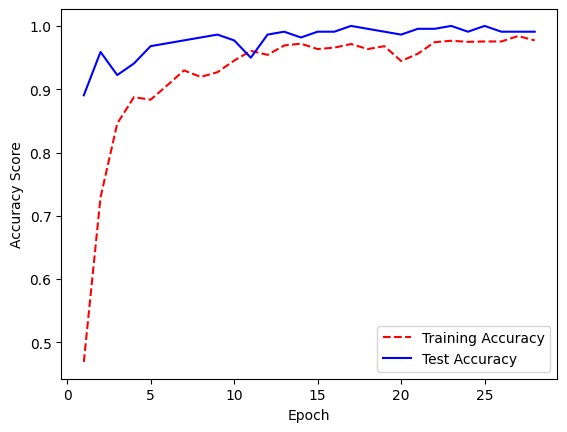

In [15]:
def visualizeAccuracy(history):
    training_accuracy = history.history['accuracy']
    test_accuracy = history.history['val_accuracy']

    epoch_count = range(1,len(training_accuracy)+1)

    plt.plot(epoch_count,training_accuracy,"r--")
    plt.plot(epoch_count,test_accuracy,"b-")
    plt.legend(["Training Accuracy","Test Accuracy"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy Score")
    plt.show()
visualizeAccuracy(history=history)

In [64]:
print(network.evaluate(X_test,y_test,batch_size=64))

7/7 [==============================] - 0s 6ms/step - loss: 0.1152 - accuracy: 0.9680
[0.11524117738008499, 0.9680365324020386]


### ImageDataGenerator

In [7]:
from keras.preprocessing.image import ImageDataGenerator

augmentation = ImageDataGenerator(
                                  zoom_range=0.2,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  vertical_flip=True,
                                  horizontal_flip=True,
                                  rotation_range=20, #preko 20 ruka moze da se odsece sa slike
                                  fill_mode='nearest'
                                  )
test_augmentation = ImageDataGenerator(validation_split=0.5)

augmentation.fit(X_train)
test_augmentation.fit(X_test)

train_data = augmentation.flow(X_train,y_train,batch_size=64)
test_data = test_augmentation.flow(X_test,y_test,batch_size=64,subset="training")
validation_data = test_augmentation.flow(X_test,y_test,batch_size=64,subset="validation")



In [187]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=(50,75,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_65 (Conv2D)          (None, 46, 71, 64)        4864      
                                                                 
 max_pooling2d_65 (MaxPoolin  (None, 23, 35, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 21, 33, 32)        18464     
                                                                 
 max_pooling2d_66 (MaxPoolin  (None, 10, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_67 (Conv2D)          (None, 8, 14, 128)        36992     
                                                                 
 max_pooling2d_67 (MaxPoolin  (None, 4, 7, 128)      

In [188]:
model.compile(optimizer= tf.keras.optimizers.Adam(lr = 0.001),loss='categorical_crossentropy',metrics=['accuracy'])

c:\Users\Nikola\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [189]:
history = model.fit(train_data,epochs=50,verbose=2,batch_size=64,validation_data=validation_data)


Epoch 1/50
28/28 - 3s - loss: 1.0966 - accuracy: 0.3657 - val_loss: 1.0324 - val_accuracy: 0.3836 - 3s/epoch - 108ms/step
Epoch 2/50
28/28 - 3s - loss: 0.9141 - accuracy: 0.5789 - val_loss: 0.5403 - val_accuracy: 0.8584 - 3s/epoch - 118ms/step
Epoch 3/50
28/28 - 3s - loss: 0.5644 - accuracy: 0.7674 - val_loss: 0.3302 - val_accuracy: 0.9041 - 3s/epoch - 106ms/step
Epoch 4/50
28/28 - 4s - loss: 0.4617 - accuracy: 0.8217 - val_loss: 0.3066 - val_accuracy: 0.9178 - 4s/epoch - 139ms/step
Epoch 5/50
28/28 - 4s - loss: 0.4107 - accuracy: 0.8406 - val_loss: 0.2448 - val_accuracy: 0.9224 - 4s/epoch - 156ms/step
Epoch 6/50
28/28 - 3s - loss: 0.3934 - accuracy: 0.8577 - val_loss: 0.2075 - val_accuracy: 0.9315 - 3s/epoch - 100ms/step
Epoch 7/50
28/28 - 3s - loss: 0.3816 - accuracy: 0.8566 - val_loss: 0.2564 - val_accuracy: 0.9361 - 3s/epoch - 97ms/step
Epoch 8/50
28/28 - 3s - loss: 0.3421 - accuracy: 0.8686 - val_loss: 0.1526 - val_accuracy: 0.9543 - 3s/epoch - 123ms/step
Epoch 9/50
28/28 - 2s - l

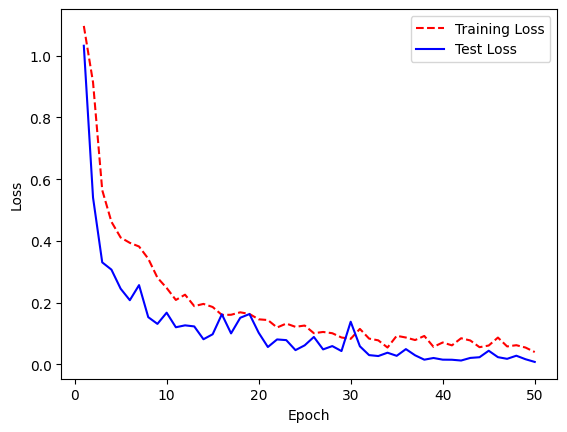

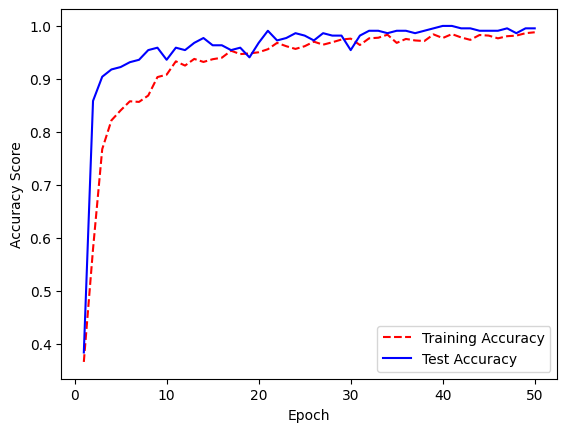

In [190]:
visualizeLoss(history=history)
visualizeAccuracy(history=history)

In [191]:
print(model.evaluate(test_data))

4/4 [==============================] - 0s 6ms/step - loss: 0.0169 - accuracy: 0.9954
[0.01685432158410549, 0.9954338073730469]


### Callbacks

In [192]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=(50,75,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_68 (Conv2D)          (None, 46, 71, 64)        4864      
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 23, 35, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_69 (Conv2D)          (None, 21, 33, 32)        18464     
                                                                 
 max_pooling2d_69 (MaxPoolin  (None, 10, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_70 (Conv2D)          (None, 8, 14, 128)        36992     
                                                                 
 max_pooling2d_70 (MaxPoolin  (None, 4, 7, 128)      

In [193]:
model.compile(optimizer= tf.keras.optimizers.Adam(lr = 0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
from keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

earlyStopping = EarlyStopping(monitor="val_loss", patience=5)
checkpoint = ModelCheckpoint(filepath="best_model.h5",monitor="val_loss",save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=3, min_lr=0.0001)
callbacks=[earlyStopping,checkpoint,reduce_lr]

In [195]:
history = model.fit(train_data,epochs=50,verbose=2,batch_size=64,callbacks=callbacks,validation_data=validation_data)

Epoch 1/50
28/28 - 3s - loss: 1.0803 - accuracy: 0.4114 - val_loss: 0.9795 - val_accuracy: 0.5616 - lr: 0.0010 - 3s/epoch - 123ms/step
Epoch 2/50
28/28 - 4s - loss: 0.9326 - accuracy: 0.5520 - val_loss: 0.4831 - val_accuracy: 0.8630 - lr: 0.0010 - 4s/epoch - 126ms/step
Epoch 3/50
28/28 - 3s - loss: 0.6143 - accuracy: 0.7571 - val_loss: 0.2936 - val_accuracy: 0.9132 - lr: 0.0010 - 3s/epoch - 103ms/step
Epoch 4/50
28/28 - 3s - loss: 0.4788 - accuracy: 0.8074 - val_loss: 0.2968 - val_accuracy: 0.9269 - lr: 0.0010 - 3s/epoch - 116ms/step
Epoch 5/50
28/28 - 2s - loss: 0.4216 - accuracy: 0.8406 - val_loss: 0.2301 - val_accuracy: 0.9087 - lr: 0.0010 - 2s/epoch - 67ms/step
Epoch 6/50
28/28 - 2s - loss: 0.3847 - accuracy: 0.8480 - val_loss: 0.1947 - val_accuracy: 0.9269 - lr: 0.0010 - 2s/epoch - 64ms/step
Epoch 7/50
28/28 - 3s - loss: 0.3793 - accuracy: 0.8560 - val_loss: 0.2296 - val_accuracy: 0.9315 - lr: 0.0010 - 3s/epoch - 112ms/step
Epoch 8/50
28/28 - 3s - loss: 0.3215 - accuracy: 0.8846 -

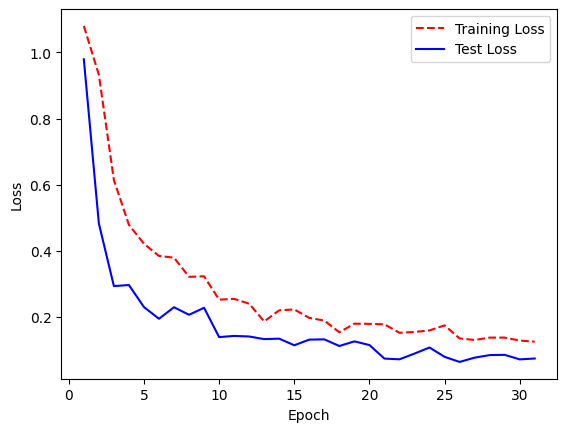

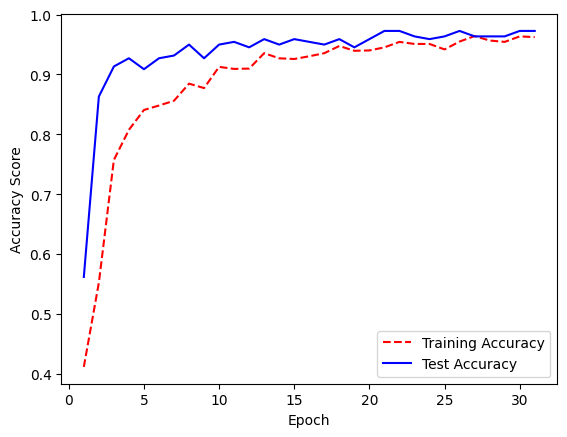

In [196]:
visualizeLoss(history=history)
visualizeAccuracy(history=history)

In [197]:
print(model.evaluate(test_data))

4/4 [==============================] - 0s 6ms/step - loss: 0.0762 - accuracy: 0.9726
[0.07618610560894012, 0.9726027250289917]


In [9]:
callbacks=[earlyStopping,checkpoint]

In [210]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=(50,75,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_77 (Conv2D)          (None, 46, 71, 64)        4864      
                                                                 
 max_pooling2d_77 (MaxPoolin  (None, 23, 35, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_78 (Conv2D)          (None, 21, 33, 32)        18464     
                                                                 
 max_pooling2d_78 (MaxPoolin  (None, 10, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_79 (Conv2D)          (None, 8, 14, 128)        36992     
                                                                 
 max_pooling2d_79 (MaxPoolin  (None, 4, 7, 128)      

In [211]:
model.compile(optimizer= tf.keras.optimizers.Adam(lr = 0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [212]:
history = model.fit(train_data,epochs=50,verbose=2,batch_size=64,callbacks=callbacks,validation_data=validation_data)

Epoch 1/50
28/28 - 3s - loss: 1.0957 - accuracy: 0.3669 - val_loss: 1.0417 - val_accuracy: 0.5708 - 3s/epoch - 121ms/step
Epoch 2/50
28/28 - 3s - loss: 0.9786 - accuracy: 0.5131 - val_loss: 0.6583 - val_accuracy: 0.7900 - 3s/epoch - 101ms/step
Epoch 3/50
28/28 - 4s - loss: 0.6363 - accuracy: 0.7326 - val_loss: 0.2853 - val_accuracy: 0.9087 - 4s/epoch - 148ms/step
Epoch 4/50
28/28 - 3s - loss: 0.4753 - accuracy: 0.8314 - val_loss: 0.2386 - val_accuracy: 0.9178 - 3s/epoch - 100ms/step
Epoch 5/50
28/28 - 4s - loss: 0.4561 - accuracy: 0.8303 - val_loss: 0.3174 - val_accuracy: 0.9087 - 4s/epoch - 145ms/step
Epoch 6/50
28/28 - 2s - loss: 0.3973 - accuracy: 0.8491 - val_loss: 0.1792 - val_accuracy: 0.9361 - 2s/epoch - 87ms/step
Epoch 7/50
28/28 - 3s - loss: 0.3905 - accuracy: 0.8583 - val_loss: 0.2528 - val_accuracy: 0.9269 - 3s/epoch - 98ms/step
Epoch 8/50
28/28 - 2s - loss: 0.3426 - accuracy: 0.8789 - val_loss: 0.1622 - val_accuracy: 0.9406 - 2s/epoch - 68ms/step
Epoch 9/50
28/28 - 3s - los

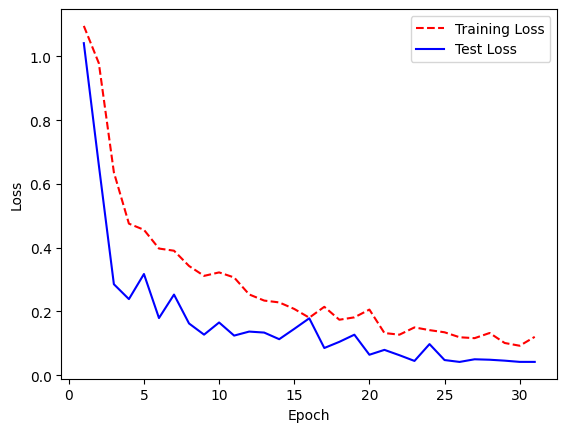

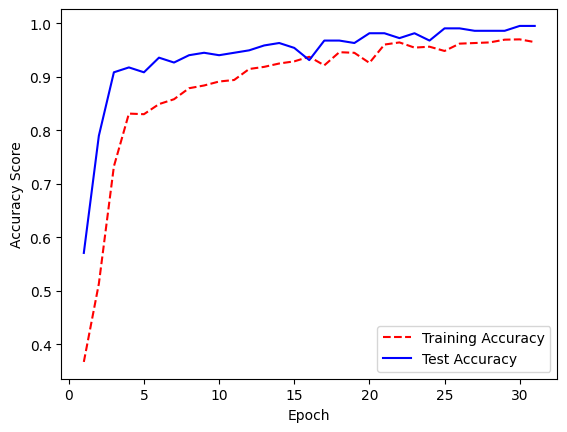

In [213]:
visualizeLoss(history=history)
visualizeAccuracy(history=history)

In [214]:
print(model.evaluate(test_data))

4/4 [==============================] - 0s 9ms/step - loss: 0.0507 - accuracy: 0.9909
[0.050737954676151276, 0.990867555141449]


### Custom Loss Function

In [10]:
def customLossFunction(y_true,y_pred):
    #cce =  tf.keras.losses.CategoricalCrossentropy()
    #return cce(y_true,y_pred)
    #  
    #squared_difference = tf.square(y_true - y_pred)
    #return tf.reduce_mean(squared_difference, axis=-1)

    log_y_pred = tf.math.log(y_pred)
    elements = -tf.math.multiply_no_nan(x=log_y_pred, y=y_true)
    return tf.reduce_mean(tf.reduce_sum(elements,axis=1))

In [199]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=(50,75,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_71 (Conv2D)          (None, 46, 71, 64)        4864      
                                                                 
 max_pooling2d_71 (MaxPoolin  (None, 23, 35, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_72 (Conv2D)          (None, 21, 33, 32)        18464     
                                                                 
 max_pooling2d_72 (MaxPoolin  (None, 10, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_73 (Conv2D)          (None, 8, 14, 128)        36992     
                                                                 
 max_pooling2d_73 (MaxPoolin  (None, 4, 7, 128)      

In [200]:
model.compile(optimizer= tf.keras.optimizers.Adam(lr = 0.001),loss=customLossFunction,metrics=['accuracy'])

In [201]:
history = model.fit(train_data,epochs=50,verbose=2,batch_size=64,callbacks=callbacks,validation_data=validation_data)

Epoch 1/50
28/28 - 6s - loss: 1.0754 - accuracy: 0.3663 - val_loss: 0.8707 - val_accuracy: 0.6438 - lr: 0.0010 - 6s/epoch - 229ms/step
Epoch 2/50
28/28 - 3s - loss: 0.7516 - accuracy: 0.6749 - val_loss: 0.8811 - val_accuracy: 0.6621 - lr: 0.0010 - 3s/epoch - 114ms/step
Epoch 3/50
28/28 - 6s - loss: 0.5656 - accuracy: 0.7703 - val_loss: 0.3021 - val_accuracy: 0.9041 - lr: 0.0010 - 6s/epoch - 199ms/step
Epoch 4/50
28/28 - 2s - loss: 0.4607 - accuracy: 0.8251 - val_loss: 0.3038 - val_accuracy: 0.9087 - lr: 0.0010 - 2s/epoch - 87ms/step
Epoch 5/50
28/28 - 3s - loss: 0.4090 - accuracy: 0.8474 - val_loss: 0.3029 - val_accuracy: 0.8858 - lr: 0.0010 - 3s/epoch - 90ms/step
Epoch 6/50
28/28 - 3s - loss: 0.4173 - accuracy: 0.8383 - val_loss: 0.2764 - val_accuracy: 0.9224 - lr: 0.0010 - 3s/epoch - 105ms/step
Epoch 7/50
28/28 - 2s - loss: 0.3771 - accuracy: 0.8589 - val_loss: 0.2132 - val_accuracy: 0.9315 - lr: 0.0010 - 2s/epoch - 85ms/step
Epoch 8/50
28/28 - 3s - loss: 0.3200 - accuracy: 0.8903 - 

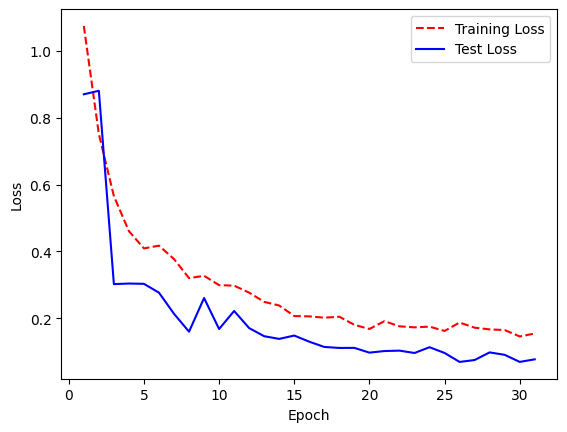

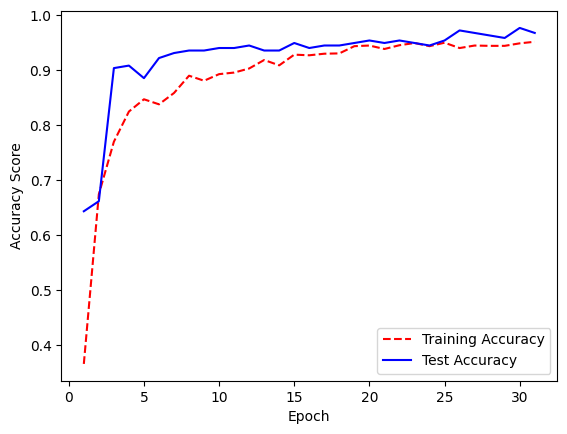

In [202]:
visualizeLoss(history=history)
visualizeAccuracy(history=history)

In [203]:
print(model.evaluate(test_data))

4/4 [==============================] - 0s 6ms/step - loss: 0.0618 - accuracy: 0.9817
[0.06175502389669418, 0.9817351698875427]


### Forcing overfitting

In [204]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=(50,75,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_74 (Conv2D)          (None, 46, 71, 64)        4864      
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 23, 35, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_75 (Conv2D)          (None, 21, 33, 32)        18464     
                                                                 
 max_pooling2d_75 (MaxPoolin  (None, 10, 16, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_76 (Conv2D)          (None, 8, 14, 128)        36992     
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 4, 7, 128)      

In [205]:
model.compile(optimizer= tf.keras.optimizers.Adam(lr = 0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [206]:
history = model.fit(X_train,y_train,epochs=100,verbose=2,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/100
28/28 - 5s - loss: 0.7475 - accuracy: 0.6577 - val_loss: 0.3569 - val_accuracy: 0.8584 - 5s/epoch - 172ms/step
Epoch 2/100
28/28 - 3s - loss: 0.2095 - accuracy: 0.9303 - val_loss: 0.1417 - val_accuracy: 0.9543 - 3s/epoch - 92ms/step
Epoch 3/100
28/28 - 2s - loss: 0.1067 - accuracy: 0.9640 - val_loss: 0.1158 - val_accuracy: 0.9658 - 2s/epoch - 61ms/step
Epoch 4/100
28/28 - 2s - loss: 0.0895 - accuracy: 0.9703 - val_loss: 0.1057 - val_accuracy: 0.9680 - 2s/epoch - 56ms/step
Epoch 5/100
28/28 - 2s - loss: 0.0664 - accuracy: 0.9846 - val_loss: 0.0757 - val_accuracy: 0.9817 - 2s/epoch - 76ms/step
Epoch 6/100
28/28 - 3s - loss: 0.0448 - accuracy: 0.9886 - val_loss: 0.1115 - val_accuracy: 0.9703 - 3s/epoch - 116ms/step
Epoch 7/100
28/28 - 2s - loss: 0.0499 - accuracy: 0.9863 - val_loss: 0.0852 - val_accuracy: 0.9795 - 2s/epoch - 65ms/step
Epoch 8/100
28/28 - 3s - loss: 0.0586 - accuracy: 0.9789 - val_loss: 0.1265 - val_accuracy: 0.9703 - 3s/epoch - 123ms/step
Epoch 9/100
28/28 - 2

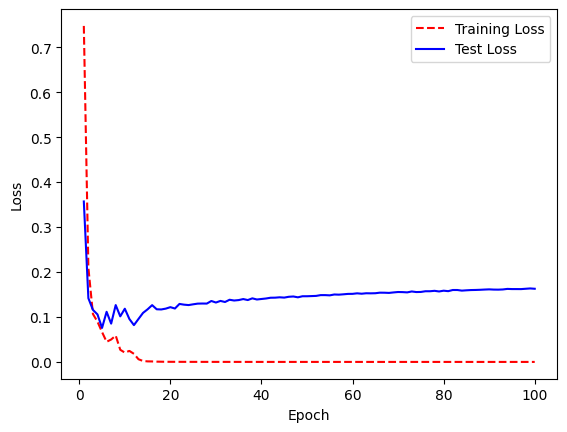

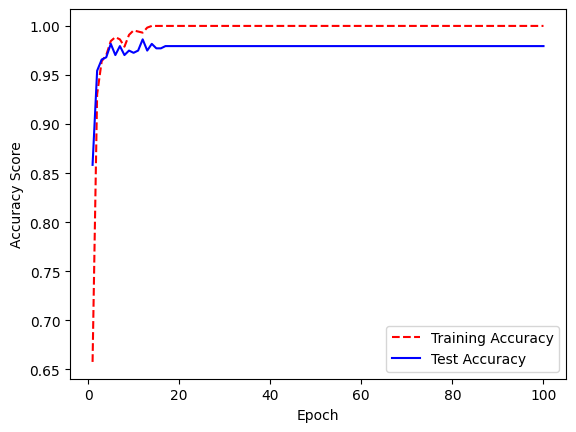

In [207]:
visualizeLoss(history=history)
visualizeAccuracy(history=history)

In [208]:
print(model.evaluate(X_test,y_test))

14/14 [==============================] - 0s 6ms/step - loss: 0.1628 - accuracy: 0.9795
[0.16275206208229065, 0.9794520735740662]


### Najbolji model

In [23]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(5,5),input_shape=(50,75,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 46, 71, 64)        4864      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 35, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 21, 33, 32)        18464     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 10, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 14, 128)        36992     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 7, 128)       

In [24]:
model.compile(optimizer= tf.keras.optimizers.Adam(lr = 0.001),loss=customLossFunction,metrics=['accuracy'])

c:\Users\Nikola\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [25]:
history = model.fit(train_data,epochs=50,verbose=2,batch_size=64,callbacks=callbacks,validation_data=validation_data)

Epoch 1/50
28/28 - 3s - loss: 1.0114 - accuracy: 0.4720 - val_loss: 0.7439 - val_accuracy: 0.5936 - 3s/epoch - 90ms/step
Epoch 2/50
28/28 - 2s - loss: 0.6672 - accuracy: 0.7394 - val_loss: 0.3369 - val_accuracy: 0.8995 - 2s/epoch - 62ms/step
Epoch 3/50
28/28 - 2s - loss: 0.4916 - accuracy: 0.8149 - val_loss: 0.2516 - val_accuracy: 0.9361 - 2s/epoch - 63ms/step
Epoch 4/50
28/28 - 2s - loss: 0.4244 - accuracy: 0.8411 - val_loss: 0.2740 - val_accuracy: 0.9269 - 2s/epoch - 63ms/step
Epoch 5/50
28/28 - 2s - loss: 0.3796 - accuracy: 0.8474 - val_loss: 0.1573 - val_accuracy: 0.9680 - 2s/epoch - 62ms/step
Epoch 6/50
28/28 - 2s - loss: 0.3439 - accuracy: 0.8731 - val_loss: 0.1630 - val_accuracy: 0.9406 - 2s/epoch - 62ms/step
Epoch 7/50
28/28 - 2s - loss: 0.2979 - accuracy: 0.8949 - val_loss: 0.0880 - val_accuracy: 0.9772 - 2s/epoch - 62ms/step
Epoch 8/50
28/28 - 2s - loss: 0.3142 - accuracy: 0.8811 - val_loss: 0.1384 - val_accuracy: 0.9680 - 2s/epoch - 63ms/step
Epoch 9/50
28/28 - 2s - loss: 0.

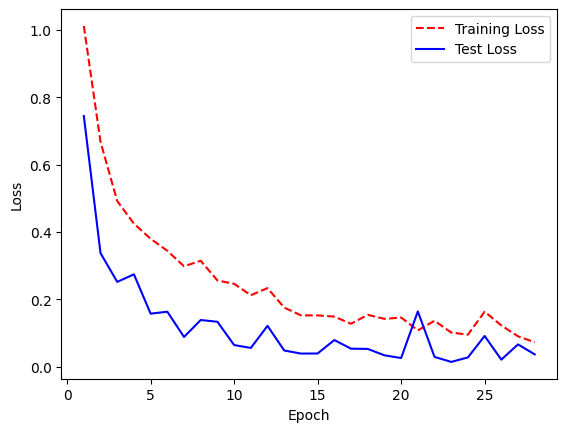

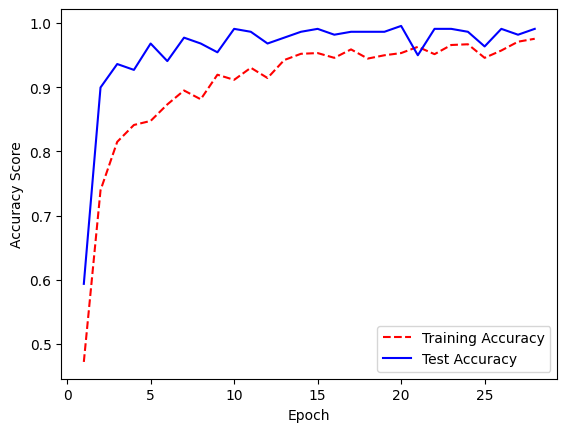

In [26]:
visualizeLoss(history=history)
visualizeAccuracy(history=history)

In [27]:
print(model.evaluate(test_data))

4/4 [==============================] - 0s 8ms/step - loss: 0.0363 - accuracy: 0.9909
[0.03632436692714691, 0.990867555141449]


In [28]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
pred = np.argmax(y_pred,axis=1)
target_test = np.argmax(y_test,axis=1)

print(classification_report(target_test,pred,target_names = subfolders,digits=5))

14/14 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

       paper    0.97468   1.00000   0.98718       154
        rock    1.00000   1.00000   1.00000       142
    scissors    1.00000   0.97183   0.98571       142

    accuracy                        0.99087       438
   macro avg    0.99156   0.99061   0.99096       438
weighted avg    0.99110   0.99087   0.99086       438



[[154   0   0]
 [  0 142   0]
 [  4   0 138]]


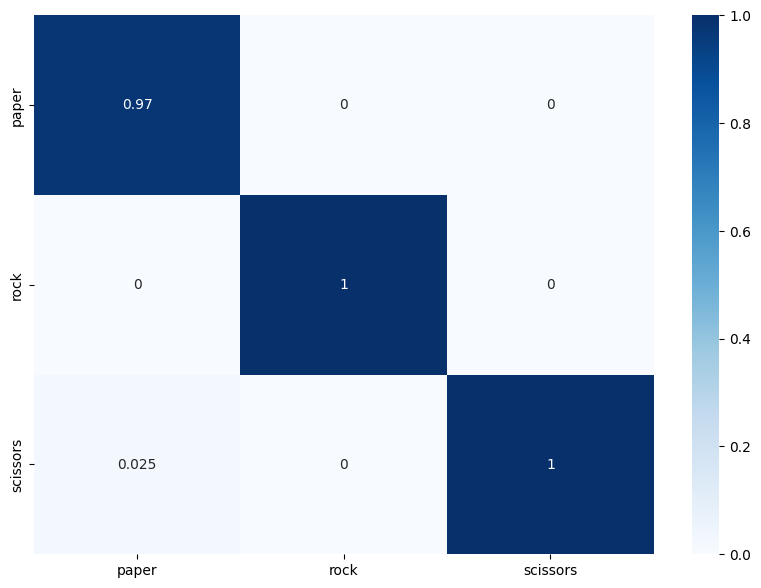

In [34]:
from sklearn.metrics import confusion_matrix
import pandas as pd

print(confusion_matrix(target_test, pred))

def plot_cfm(target_test, pred, cfm_file_name: str):
    cfm_result = confusion_matrix(target_test, pred, normalize="pred")
    classes = subfolders
    df_cfm = pd.DataFrame(cfm_result, index = classes, columns = classes)
    plt.figure(figsize = (10,7))
    cfm_plot = sns.heatmap(df_cfm, annot=True,cmap=plt.cm.Blues)

plot_cfm(target_test, pred, "cfm_initial")